## CWRU-Case 1. Example for paper.

In [16]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.utils import shuffle
import numpy as np
import scipy.io
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt;
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


In [17]:
# Define the number of trials that we want to do:
number_Of_Trials=10;

In [18]:
# Root folder of the datasets

root_folder_="C:/Users/Olga/Desktop/CRWU/Datasets/";

In [19]:
# Number of classes
myN=10;

# Buidling neural network model
def build_my_model(numberOfClasses):
    model = Sequential()
    model.add(Dense(50, input_dim=50, activation="tanh"))
    model.add(Dense(numberOfClasses))
    #model.add(Dense(numberOfClasses, activation="softmax"))
    #model.compile(loss="categorical_crossentropy",optimizer='adam', metrics=["accuracy"]) 
    opt = tf.keras.optimizers.Adam(learning_rate=1e-4, decay=1e-3 / 200)
    model.compile(optimizer=opt,
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    #print(model.summary())
    return model;

In [20]:
# function for training number_Of_Trials runs
def training(myN, number_Of_Trials, model_name):
    for i in range(number_Of_Trials):
        print("Run N %d" % (i+1))
        #Loading training data
        data = pd.read_csv(path_to_train,header=None)
        data = data.iloc[np.random.permutation(len(data))]
        labels=data.iloc[:,51]
        features = data.iloc[:,1:51]
        X=features
        y=np.ravel(labels)
        X_train, y_train = shuffle(X, y)
        #print(X_train.shape)
        
        #Loading testing data
        data12 = pd.read_csv(path_to_test,header=None)
        labels12=data12.iloc[:,51]
        features12 = data12.iloc[:,1:51]
        X12=features12
        y12=np.ravel(labels12)
        X_test=X12;
        y_test=y12;
        #print(X_test.shape)
        
        # Making target data in range [0,9]
        y_train=y_train-1;
        y_test=y_test-1;
        # Convert to categorical
        Y_train = np_utils.to_categorical(y_train, myN) 
        Y_test = np_utils.to_categorical(y_test, myN)
        Y_test.shape
        
        # Training model
        checkpoint_path='d:/Data/Models/'+model_name+'.h5'
        keras_callbacks   = [
            EarlyStopping(monitor='val_loss', patience=50, verbose=1),
            ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)
        ]
        
        model=build_my_model(myN);
        history=model.fit(X_train, Y_train,epochs=2000, batch_size=27, verbose=0, validation_split=0.1,callbacks=[keras_callbacks])
        best_model = load_model(checkpoint_path)
        model=best_model;
        
        # Calculate score
        scores = model.evaluate(X_test, Y_test, verbose=2) 
        print(scores)
        temp_results[i]=scores[1]
        
    # Draw confusion matrix (It is only for the last trial)
    predictions=model.predict(X_test);
    confusion=confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(predictions,axis=1));
    
    dataset_labels=np.array(['0','1','2','3','4','5','6','7','8','9'])
    ##
    df_cm = pd.DataFrame(confusion, 
                      dataset_labels, 
                      dataset_labels)
    sn.set(font_scale=1.2) # for label size
    plt.figure(figsize=(4,4))
    sn.heatmap(df_cm,annot=True,annot_kws={"size": 10},fmt = "d",linewidths=.5,cmap="YlGnBu") 
    plt.title(confusion_title)
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    
    # Print classification report
    print('CLASSIFICATION REPORT\n',
          classification_report(np.argmax(Y_test, axis=1), 
                                np.argmax(predictions, axis=1), 
                                target_names=dataset_labels))
    
    # Plot Training and Validation Accuracy and  Training and Validation Loss
    plt.rcParams['figure.dpi'] = 100
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(history.history['loss']))
    
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# Testing Sub-dataset #1

Run N 1
10/10 - 0s - loss: 9.2227e-07 - accuracy: 1.0000 - 75ms/epoch - 8ms/step
[9.222741255143774e-07, 1.0]
Run N 2
10/10 - 0s - loss: 8.7258e-07 - accuracy: 1.0000 - 89ms/epoch - 9ms/step
[8.725774591766822e-07, 1.0]
Run N 3
10/10 - 0s - loss: 1.0258e-06 - accuracy: 1.0000 - 75ms/epoch - 8ms/step
[1.025783035402128e-06, 1.0]
Run N 4
10/10 - 0s - loss: 1.5560e-06 - accuracy: 1.0000 - 71ms/epoch - 7ms/step
[1.555997300783929e-06, 1.0]
Run N 5
10/10 - 0s - loss: 8.4417e-07 - accuracy: 1.0000 - 73ms/epoch - 7ms/step
[8.441742238574079e-07, 1.0]
Run N 6
10/10 - 0s - loss: 5.5120e-07 - accuracy: 1.0000 - 81ms/epoch - 8ms/step
[5.511984113582002e-07, 1.0]
Run N 7
Epoch 01570: early stopping
10/10 - 0s - loss: 9.8628e-06 - accuracy: 1.0000 - 72ms/epoch - 7ms/step
[9.862762453849427e-06, 1.0]
Run N 8
10/10 - 0s - loss: 2.6696e-06 - accuracy: 1.0000 - 72ms/epoch - 7ms/step
[2.6696275199356023e-06, 1.0]
Run N 9
10/10 - 0s - loss: 1.0437e-06 - accuracy: 1.0000 - 78ms/epoch - 8ms/step
[1.0437175

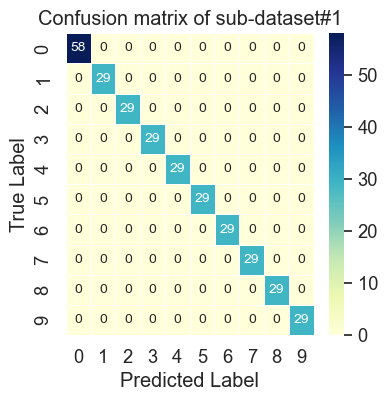

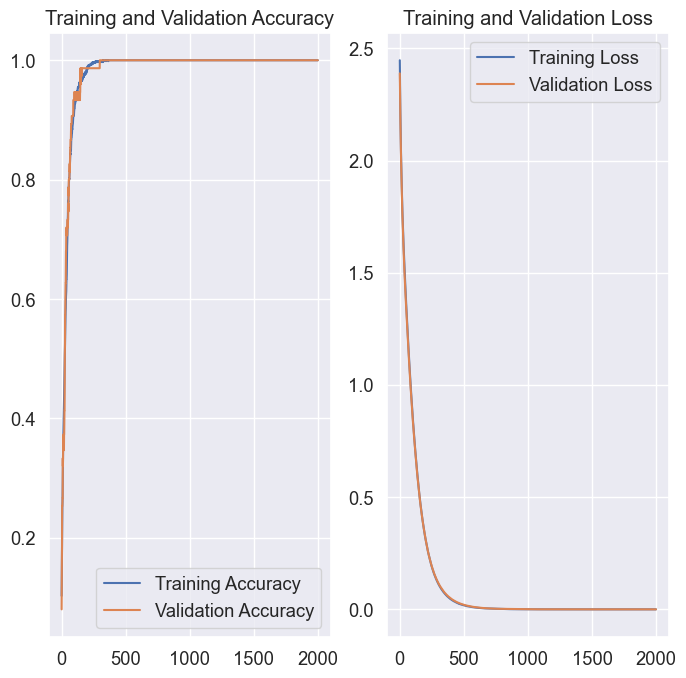

In [21]:
# Title of confusin matrix we want to show:
confusion_title="Confusion matrix of sub-dataset#1"

# Path to train
path_to_train=root_folder_+"0/2500/Z_0_TRAIN_70_STEP_2500_OVERLAP_50_PERCERNT_LPC_50_.csv"

# Path to test
path_to_test=root_folder_+"0/2500/Z_0_TEST_70_STEP_2500_OVERLAP_50_PERCERNT_LPC_50_.csv"


# Define an array to save reults of each trial of each expirement
# It is used to calculate the average of each expirement
temp_results=np.zeros(number_Of_Trials)

training(myN, number_Of_Trials, 'bestmodel_0_0_Run2')

In [22]:
print("Average accuracy value while using testing dataset: %.2f%%" % (np.mean(temp_results)*100))

Average accuracy value while using testing dataset: 100.00%


# Testing Sub-dataset #2

Run N 1
12/12 - 0s - loss: 0.0095 - accuracy: 0.9973 - 73ms/epoch - 6ms/step
[0.009469456970691681, 0.9973474740982056]
Run N 2
Epoch 00638: early stopping
12/12 - 0s - loss: 0.0211 - accuracy: 0.9973 - 73ms/epoch - 6ms/step
[0.021073494106531143, 0.9973474740982056]
Run N 3
Epoch 01743: early stopping
12/12 - 0s - loss: 0.0107 - accuracy: 0.9973 - 73ms/epoch - 6ms/step
[0.010670806281268597, 0.9973474740982056]
Run N 4
12/12 - 0s - loss: 0.0145 - accuracy: 0.9973 - 73ms/epoch - 6ms/step
[0.014510164968669415, 0.9973474740982056]
Run N 5
12/12 - 0s - loss: 0.0103 - accuracy: 0.9973 - 74ms/epoch - 6ms/step
[0.010254577733576298, 0.9973474740982056]
Run N 6
Epoch 01336: early stopping
12/12 - 0s - loss: 0.0166 - accuracy: 0.9973 - 78ms/epoch - 7ms/step
[0.016557488590478897, 0.9973474740982056]
Run N 7
12/12 - 0s - loss: 0.0173 - accuracy: 0.9973 - 72ms/epoch - 6ms/step
[0.01734672114253044, 0.9973474740982056]
Run N 8
Epoch 01863: early stopping
12/12 - 0s - loss: 0.0145 - accuracy: 0.9

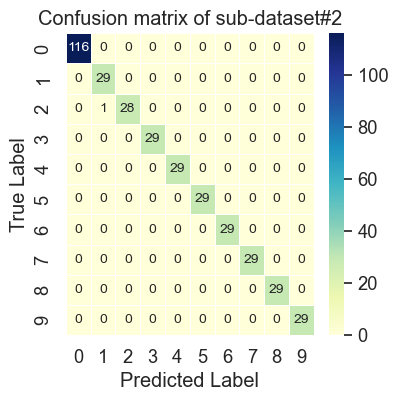

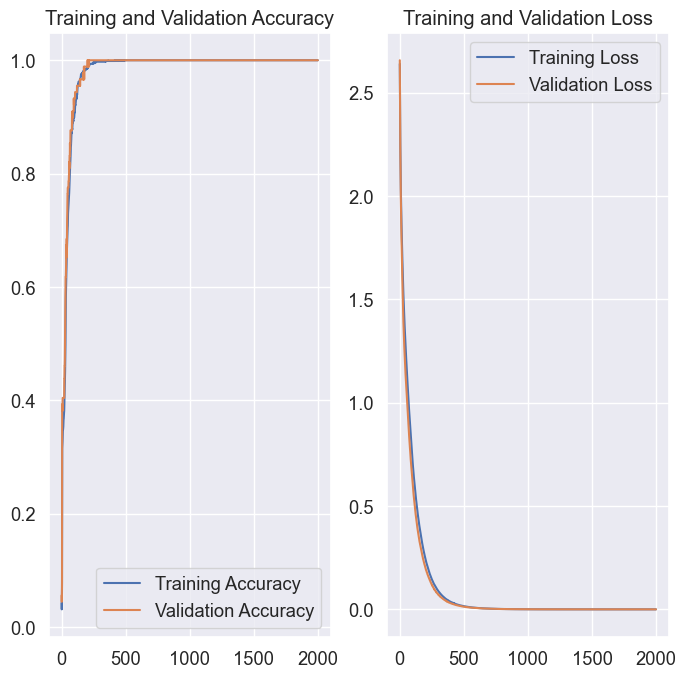

In [23]:
# Title of confusin matrix we want to show:
confusion_title="Confusion matrix of sub-dataset#2"

# Path to train
path_to_train=root_folder_+"1/2500/Z_1_TRAIN_70_STEP_2500_OVERLAP_50_PERCERNT_LPC_50_.csv"

# Path to test
path_to_test=root_folder_+"1/2500/Z_1_TEST_70_STEP_2500_OVERLAP_50_PERCERNT_LPC_50_.csv"

# Define an array to save reults of each trial of each expirement
# It is used to calculate the average of each expirement
temp_results=np.zeros(number_Of_Trials)

training(myN, number_Of_Trials, 'bestmodel_1_1_Run2')

In [24]:
print("Average accuracy value while using testing dataset: %.2f%%" % (np.mean(temp_results)*100))

Average accuracy value while using testing dataset: 99.71%


# Testing Sub-dataset #3

Run N 1
12/12 - 0s - loss: 9.9413e-07 - accuracy: 1.0000 - 73ms/epoch - 6ms/step
[9.94129777609487e-07, 1.0]
Run N 2
12/12 - 0s - loss: 8.9895e-07 - accuracy: 1.0000 - 73ms/epoch - 6ms/step
[8.989526349978405e-07, 1.0]
Run N 3
Epoch 01991: early stopping
12/12 - 0s - loss: 1.1560e-06 - accuracy: 1.0000 - 73ms/epoch - 6ms/step
[1.1560132406884804e-06, 1.0]
Run N 4
12/12 - 0s - loss: 2.0854e-06 - accuracy: 1.0000 - 73ms/epoch - 6ms/step
[2.085423830067157e-06, 1.0]
Run N 5
Epoch 01393: early stopping
12/12 - 0s - loss: 1.7274e-05 - accuracy: 1.0000 - 73ms/epoch - 6ms/step
[1.727377821225673e-05, 1.0]
Run N 6
12/12 - 0s - loss: 1.6486e-06 - accuracy: 1.0000 - 84ms/epoch - 7ms/step
[1.6486444565089187e-06, 1.0]
Run N 7
12/12 - 0s - loss: 1.1908e-06 - accuracy: 1.0000 - 80ms/epoch - 7ms/step
[1.1907826547030709e-06, 1.0]
Run N 8
12/12 - 0s - loss: 1.0441e-06 - accuracy: 1.0000 - 85ms/epoch - 7ms/step
[1.0440804771860712e-06, 1.0]
Run N 9
Epoch 01691: early stopping
12/12 - 0s - loss: 2.5703

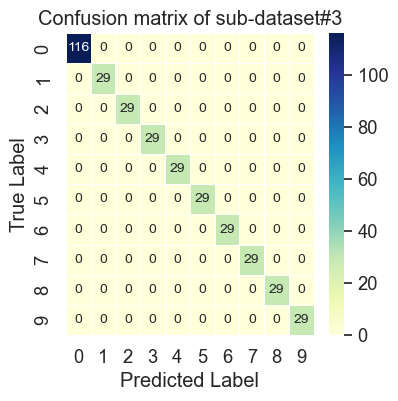

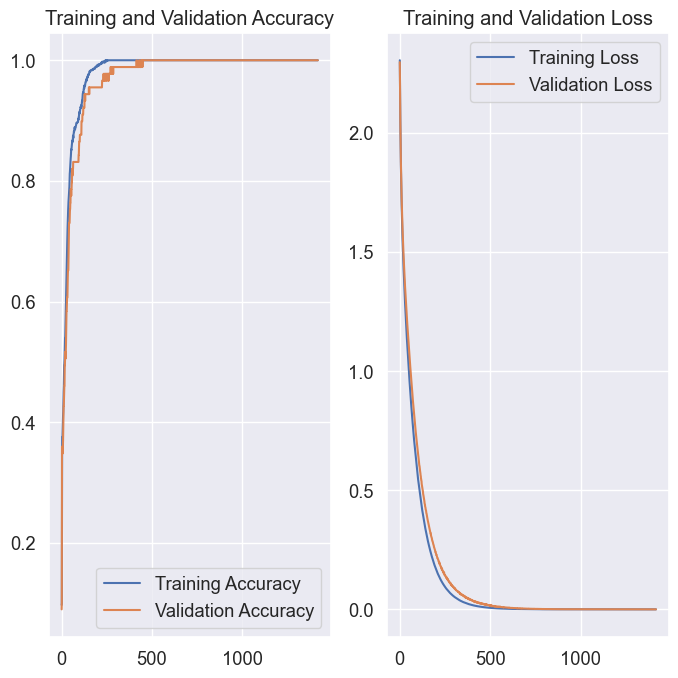

In [25]:
# Title of confusin matrix we want to show:
confusion_title="Confusion matrix of sub-dataset#3"

# Path to train
path_to_train=root_folder_+"2/2500/Z_2_TRAIN_70_STEP_2500_OVERLAP_50_PERCERNT_LPC_50_.csv"

# Path to test
path_to_test=root_folder_+"2/2500/Z_2_TEST_70_STEP_2500_OVERLAP_50_PERCERNT_LPC_50_.csv"

# Define an array to save reults of each trial of each expirement
# It is used to calculate the average of each expirement
temp_results=np.zeros(number_Of_Trials)

training(myN, number_Of_Trials, 'bestmodel_2_2_Run2')

In [26]:
print("Average accuracy value while using testing dataset: %.2f%%" % (np.mean(temp_results)*100))

Average accuracy value while using testing dataset: 100.00%


# Testing Sub-dataset #4

Run N 1
Epoch 00964: early stopping
12/12 - 0s - loss: 6.2136e-04 - accuracy: 1.0000 - 85ms/epoch - 7ms/step
[0.0006213625892996788, 1.0]
Run N 2
Epoch 01095: early stopping
12/12 - 0s - loss: 1.5209e-04 - accuracy: 1.0000 - 80ms/epoch - 7ms/step
[0.00015208902186714113, 1.0]
Run N 3
12/12 - 0s - loss: 1.8085e-06 - accuracy: 1.0000 - 81ms/epoch - 7ms/step
[1.8084875819113222e-06, 1.0]
Run N 4
12/12 - 0s - loss: 3.5382e-06 - accuracy: 1.0000 - 79ms/epoch - 7ms/step
[3.5381710858928273e-06, 1.0]
Run N 5
Epoch 01863: early stopping
12/12 - 0s - loss: 1.7552e-06 - accuracy: 1.0000 - 78ms/epoch - 7ms/step
[1.7552071085447096e-06, 1.0]
Run N 6
12/12 - 0s - loss: 2.0929e-06 - accuracy: 1.0000 - 81ms/epoch - 7ms/step
[2.0928507638018345e-06, 1.0]
Run N 7
Epoch 01656: early stopping
12/12 - 0s - loss: 2.5460e-06 - accuracy: 1.0000 - 78ms/epoch - 7ms/step
[2.5459708012931515e-06, 1.0]
Run N 8
Epoch 01562: early stopping
12/12 - 0s - loss: 1.8527e-05 - accuracy: 1.0000 - 79ms/epoch - 7ms/step
[1.

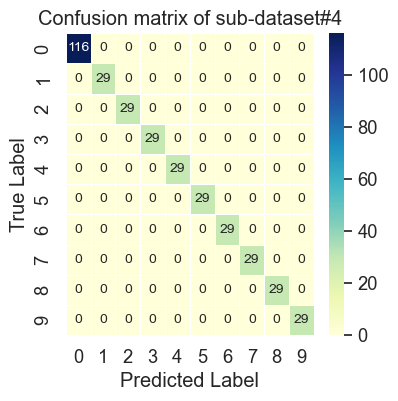

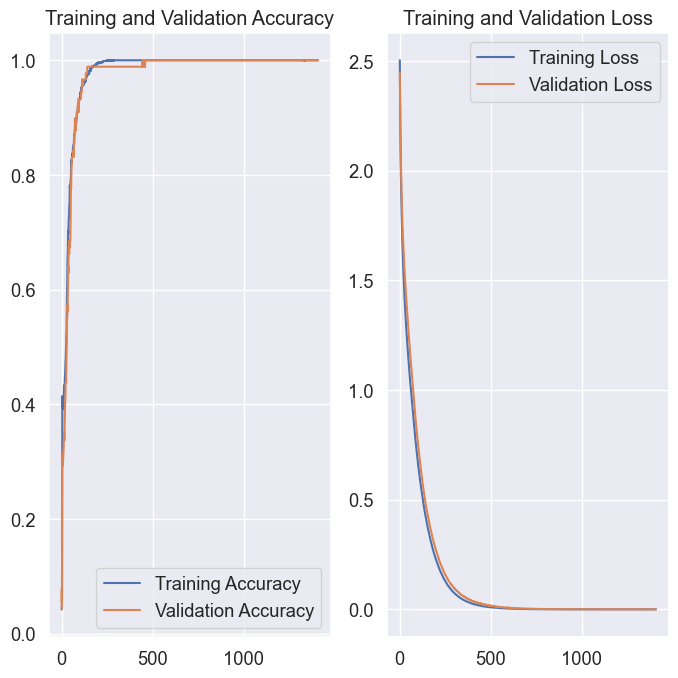

In [27]:
# Title of confusin matrix we want to show:
confusion_title="Confusion matrix of sub-dataset#4"

# Path to train
path_to_train=root_folder_+"3/2500/Z_3_TRAIN_70_STEP_2500_OVERLAP_50_PERCERNT_LPC_50_.csv"

# Path to test
path_to_test=root_folder_+"3/2500/Z_3_TEST_70_STEP_2500_OVERLAP_50_PERCERNT_LPC_50_.csv"

# Define an array to save reults of each trial of each expirement
# It is used to calculate the average of each expirement
temp_results=np.zeros(number_Of_Trials)

training(myN, number_Of_Trials, 'bestmodel_3_3_Run2')

In [28]:
print("Average accuracy value while using testing dataset: %.2f%%" % (np.mean(temp_results)*100))

Average accuracy value while using testing dataset: 100.00%


# Testing Entire dataset

Run N 1
Epoch 00626: early stopping
46/46 - 0s - loss: 5.7032e-05 - accuracy: 1.0000 - 96ms/epoch - 2ms/step
[5.703217539121397e-05, 1.0]
Run N 2
Epoch 00744: early stopping
46/46 - 0s - loss: 6.5276e-05 - accuracy: 1.0000 - 105ms/epoch - 2ms/step
[6.527619552798569e-05, 1.0]
Run N 3
Epoch 00782: early stopping
46/46 - 0s - loss: 3.0304e-05 - accuracy: 1.0000 - 123ms/epoch - 3ms/step
[3.0303765015560202e-05, 1.0]
Run N 4
Epoch 00580: early stopping
46/46 - 0s - loss: 9.7206e-05 - accuracy: 1.0000 - 100ms/epoch - 2ms/step
[9.72062989603728e-05, 1.0]
Run N 5
Epoch 00855: early stopping
46/46 - 0s - loss: 2.2627e-05 - accuracy: 1.0000 - 96ms/epoch - 2ms/step
[2.2626973077422008e-05, 1.0]
Run N 6
Epoch 01391: early stopping
46/46 - 0s - loss: 9.2700e-06 - accuracy: 1.0000 - 98ms/epoch - 2ms/step
[9.26999837247422e-06, 1.0]
Run N 7
Epoch 01983: early stopping
46/46 - 0s - loss: 2.3198e-06 - accuracy: 1.0000 - 116ms/epoch - 3ms/step
[2.3198051621875493e-06, 1.0]
Run N 8
Epoch 01278: early st

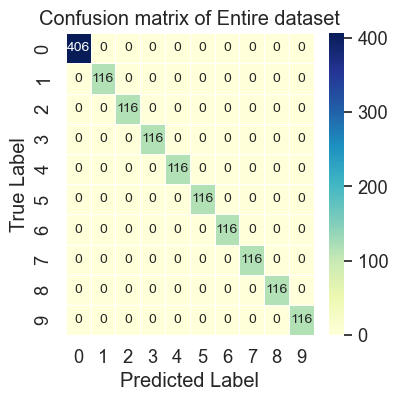

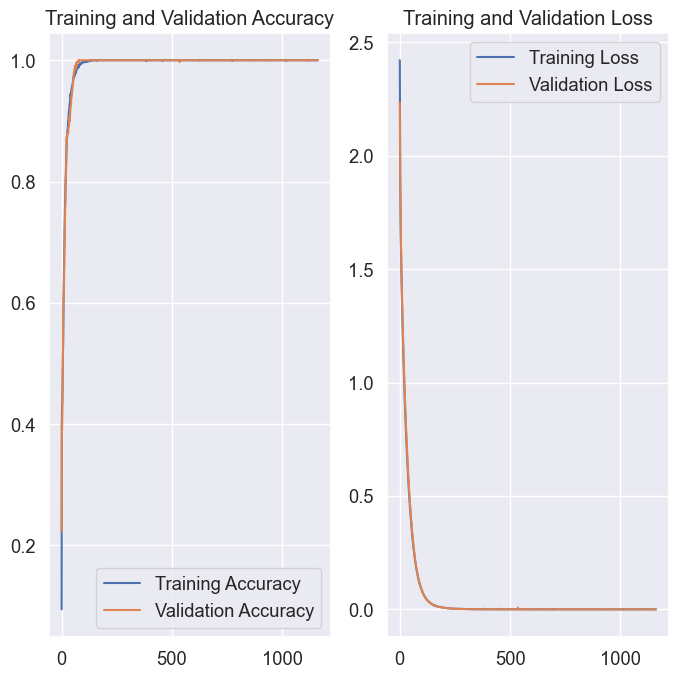

In [29]:
# Title of confusin matrix we want to show:
confusion_title="Confusion matrix of Entire dataset"

# Path to train
path_to_train=root_folder_+"ALL/2500/Z_ALL_TRAIN_70_STEP_2500_OVERLAP_50_PERCERNT_LPC_50_.csv"

# Path to test
path_to_test=root_folder_+"ALL/2500/Z_ALL_TEST_70_STEP_2500_OVERLAP_50_PERCERNT_LPC_50_.csv"


# Define an array to save reults of each trial of each expirement
# It is used to calculate the average of each expirement
temp_results=np.zeros(number_Of_Trials)

training(myN, number_Of_Trials, 'bestmodel_ALL_ALL_Run2')


In [30]:
print("Average accuracy value while using testing dataset: %.2f%%" % (np.mean(temp_results)*100))

Average accuracy value while using testing dataset: 100.00%
